# Lecture 15의 데모

### Lecture 15의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec27.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec28.ipynb


In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Distribution of the Sample Average**

In [3]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


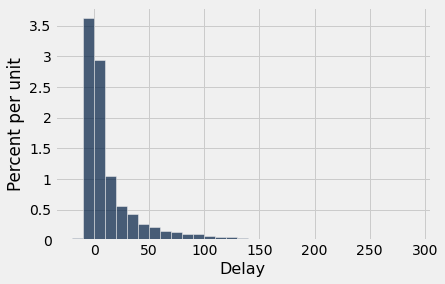

In [4]:
united.hist('Delay', bins=united_bins)

In [5]:
percentile(50, united.column('Delay'))

2

In [6]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [7]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes the mean of the delay time.
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [8]:
one_sample_mean(100)

14.039999999999999

In [9]:
def ten_thousand_sample_means(sample_size):
    """
    Use the bootstrap to approximate 
    the distribution of the sample mean
    """
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

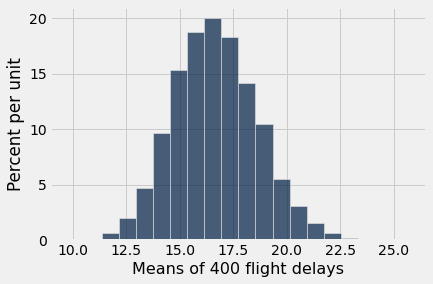

In [10]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Means of 400 flight delays',
                    sample_means_400).hist(bins=20)

In [11]:
np.mean(sample_means_400), np.std(sample_means_400)

(16.672569250000002, 1.960879633182373)

In [12]:
united.num_rows

13825

In [13]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

## **CLT: Center**

Population Average: 16.6581555154


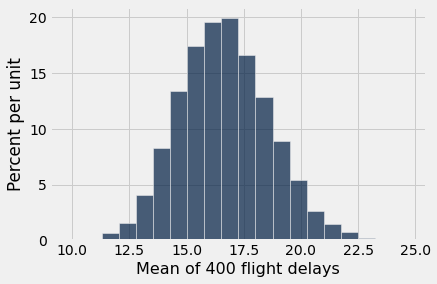

In [14]:
delay_mean = np.average(united.column('Delay'))
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

## **CLT: Spread**

In [15]:
sample_means_900 = ten_thousand_sample_means(900)

In [16]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

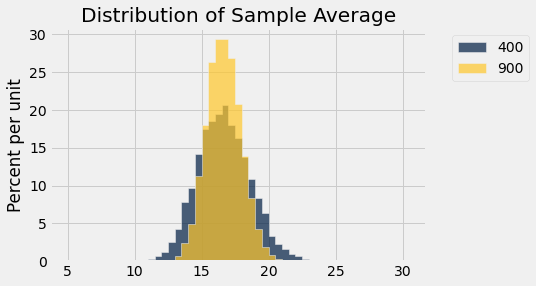

In [17]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

## **Quantifying the Effect of Sample Size**

In [18]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.659238

Population SD: 39.4801998516
SD of sample means: 3.92937968379
Ratio: 10.04743828


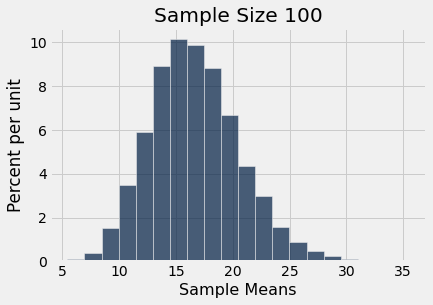

In [19]:
plot_and_summarize_sample_means(100)

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.67100675

Population SD: 39.4801998516
SD of sample means: 1.98637460989
Ratio: 19.8755056851


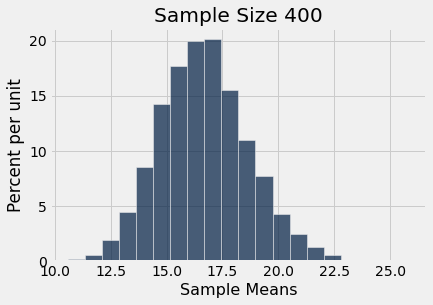

In [20]:
plot_and_summarize_sample_means(400)

Sample size:  900
Population mean: 16.6581555154
Average of sample means:  16.6574364444

Population SD: 39.4801998516
SD of sample means: 1.32076157773
Ratio: 29.8919960401


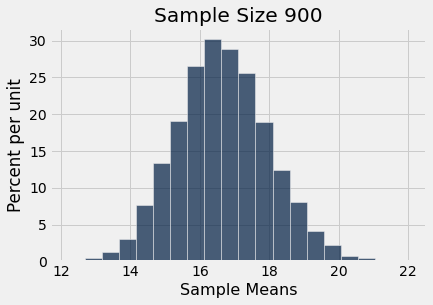

In [21]:
plot_and_summarize_sample_means(900)

In [22]:
39.48 / np.sqrt(100)

3.9479999999999995

In [23]:
39.48 / np.sqrt(400)

1.9739999999999998

In [24]:
39.48 / np.sqrt(900)

1.3159999999999998

## **Review: Lecture 13**
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [25]:
# original sample

births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [26]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [27]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [28]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

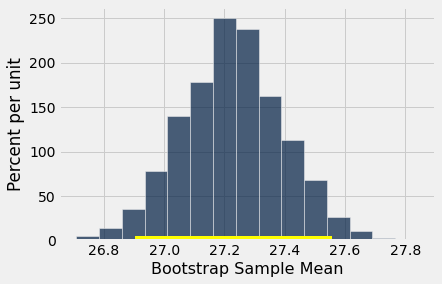

In [29]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

In [30]:
left, right

(26.902044293015333, 27.557069846678022)

## **Method Based on CLT**

In [31]:
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)
sample_size, sample_average, sample_SD

(1174, 27.228279386712096, 5.8153604041908968)

We need to add and subtract 2 * (population SD)/(sample_size ** 0.5) but we don't have the population SD.

In [32]:
# Try estimating it from the sample

estimated_SD_of_sample_average = sample_SD / (sample_size**0.5)
estimated_SD_of_sample_average

0.16972373742299796

In [33]:
# Approximate 95% confidence interval for population mean

sample_average - 2*estimated_SD_of_sample_average, sample_average + 2*estimated_SD_of_sample_average

(26.888831911866099, 27.567726861558093)

## **SD of 0/1 Population**

In [34]:
# Population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print('Standard Deviation:', np.round(np.std(zero_one_population),2))

zero_one_population

Standard Deviation: 0.4


array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [35]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population 
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), 
                                    np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [36]:
possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [37]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,Pop SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


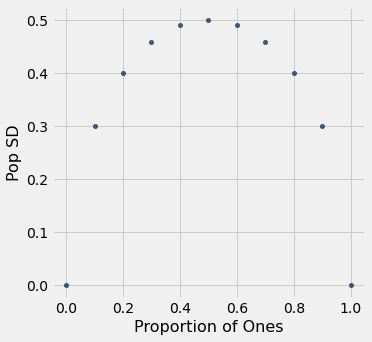

In [38]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')